 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
df_whale = pd.read_csv(
    Path("Resources/whale_returns.csv"),
    index_col = "Date",
    parse_dates = True, 
    infer_datetime_format=True
)
df_whale.sort_index(ascending = True, inplace=True)
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whale.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
df_algo = pd.read_csv(
    Path("Resources/algo_returns.csv")
)
df_algo.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
df_algo.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
df_algo.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [8]:
# join = pd.concat([df_whale, df_algo], join="inner",axis="columns")
# join

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
df_sp500 = pd.read_csv(
    Path("Resources/sp500_history.csv"),
    index_col = "Date",
    parse_dates = True, 
    infer_datetime_format=True
)
df_sp500.sort_index(ascending=True, inplace=True)

df_sp500.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [10]:
# Check Data Types
df_sp500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
df_sp500["Close"]= df_sp500["Close"].str.replace('$','')
df_sp500["Close"] = df_sp500["Close"].astype(float)
df_sp500.dtypes
df_sp500

C:\Users\Kade\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# pd_sp500 = pd.DataFrame(df_sp500)
# print(pd_sp500)

In [13]:
# Calculate Daily Returns
daily_return = df_sp500.pct_change()
display(daily_return)
daily_return.rename(columns={"Close" : "snp500"}, inplace=True)
display(daily_return)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


,snp500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Drop nulls
daily_return.dropna(inplace=True)
daily_return

,snp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Rename `Close` Column to be specific to this portfolio.
# daily_return = df_sp500.rename(columns = {"Close" : "snp500"}, inplace = True)
# daily_return

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat((df_whale, df_algo, daily_return), axis = 1, join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,snp500


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

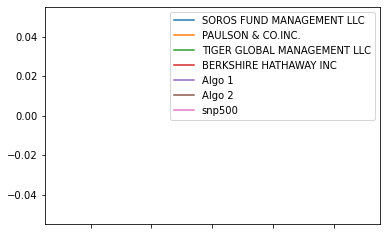

In [17]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

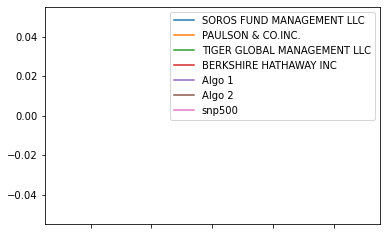

In [18]:
# Calculate cumulative returns of all portfolios
cum_returns = combined_df.cumprod()
# Plot cumulative returns
cum_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


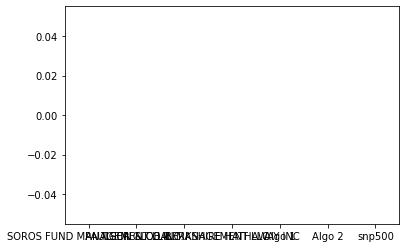

In [19]:
box = combined_df.plot.box()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
std = pd.DataFrame(combined_df.std())
std

,0
SOROS FUND MANAGEMENT LLC,NaN
PAULSON & CO.INC.,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN
BERKSHIRE HATHAWAY INC,NaN
Date,NaN
Algo 1,NaN
Algo 2,NaN
snp500,NaN


### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
snp_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
snp_std 
# Determine which portfolios are riskier than the S&P 500
risk = snp_std[snp_std["std"]] > snp_std.loc["snp500", "std"]
risk

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan], dtype='float64')] are in the [columns]"

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = snp_std*np.sqrt(252)
anual_std

,std
SOROS FUND MANAGEMENT LLC,NaN
PAULSON & CO.INC.,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN
BERKSHIRE HATHAWAY INC,NaN
Date,NaN
Algo 1,NaN
Algo 2,NaN
snp500,NaN


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

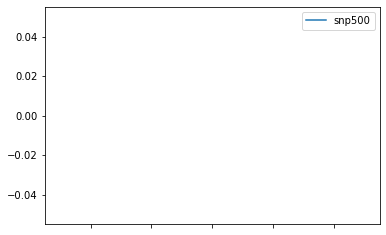

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling = combined_df[["snp500"]].rolling(window = 21).std()
# Plot the rolling standard deviation
sp500_rolling.plot()

### Calculate and plot the correlation

<AxesSubplot:xlabel='snp500', ylabel='Algo 2'>

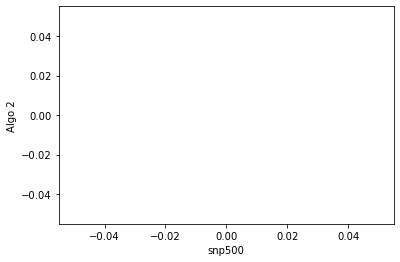

In [58]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"snp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# Display de correlation matrix
combined_df.plot(kind="scatter", y = "Algo 2", x = "snp500")


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:>

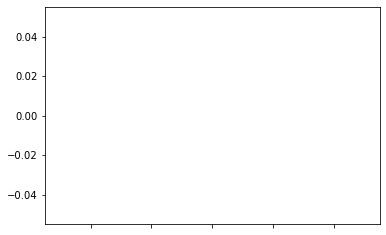

In [25]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['snp500'])
# Calculate variance of S&P 500
variance = combined_df['snp500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:>

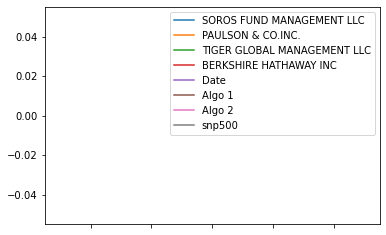

In [26]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+combined_df_ewm).cumprod().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      NaN
PAULSON & CO.INC.              NaN
TIGER GLOBAL MANAGEMENT LLC    NaN
BERKSHIRE HATHAWAY INC         NaN
Date                           NaN
Algo 1                         NaN
Algo 2                         NaN
snp500                         NaN
dtype: object

<AxesSubplot:>

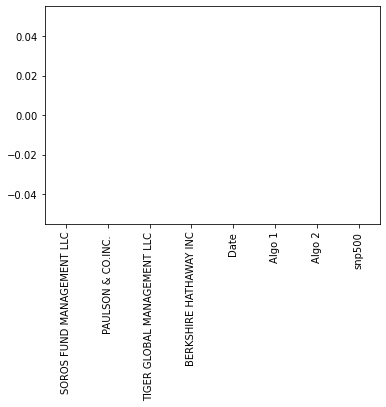

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outpreformed the S&P500 but algo 2 did not

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
df_TSLA = pd.read_csv(
    Path("Resources/TSLA.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

df_TSLA.drop("Open", inplace=True, axis=1)
df_TSLA.drop("High", inplace=True, axis=1)
df_TSLA.drop("Low", inplace=True, axis=1)
df_TSLA.drop("Adj Close", inplace=True, axis=1)
df_TSLA.drop("Volume", inplace=True, axis=1)

df_TSLA.rename(columns={"Close" : "TSLA"}, inplace=True)
df_TSLA.head()

,TSLA
Date,
2021-04-19,714.630005
2021-04-20,718.989990
2021-04-21,744.119995
2021-04-22,719.690002
2021-04-23,729.400024


In [30]:
# Reading data from 2nd stock
df_SNAP = pd.read_csv(
    Path("Resources/SNAP.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

df_SNAP.drop("Open", inplace=True, axis=1)
df_SNAP.drop("High", inplace=True, axis=1)
df_SNAP.drop("Low", inplace=True, axis=1)
df_SNAP.drop("Adj Close", inplace=True, axis=1)
df_SNAP.drop("Volume", inplace=True, axis=1)

df_SNAP.rename(columns={"Close" : "SNAP"}, inplace=True)
df_SNAP.head()

,SNAP
Date,
2021-04-19,60.439999
2021-04-20,58.490002
2021-04-21,58.299999
2021-04-22,57.049999
2021-04-23,61.299999


In [31]:
# Reading data from 3rd stock
df_TWTR = pd.read_csv(
    Path("Resources/TWTR.csv"),
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

df_TWTR.drop("Open", inplace=True, axis=1)
df_TWTR.drop("High", inplace=True, axis=1)
df_TWTR.drop("Low", inplace=True, axis=1)
df_TWTR.drop("Adj Close", inplace=True, axis=1)
df_TWTR.drop("Volume", inplace=True, axis=1)

df_TWTR.rename(columns={"Close" : "TWTR"}, inplace=True)
df_TWTR.head()

,TWTR
Date,
2021-04-19,67.940002
2021-04-20,65.699997
2021-04-21,67.330002
2021-04-22,64.309998
2021-04-23,67.019997


In [37]:
# Combine all stocks in a single DataFrame
returns = pd.concat((df_TSLA, df_SNAP, df_TWTR), axis= 1, join="inner")
returns.head()

,TSLA,SNAP,TWTR
Date,,,
2021-04-19,714.630005,60.439999,67.940002
2021-04-20,718.989990,58.490002,65.699997
2021-04-21,744.119995,58.299999,67.330002
2021-04-22,719.690002,57.049999,64.309998
2021-04-23,729.400024,61.299999,67.019997


In [33]:
# Reset Date index
# returns.reset_index() 

In [34]:
# Reorganize portfolio data by having a column per symbol


In [42]:
# Calculate daily returns
daily_returns = returns.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,TSLA,SNAP,TWTR
Date,,,
2021-04-20,0.006101,-0.032263,-0.032970
2021-04-21,0.034952,-0.003248,0.024810
2021-04-22,-0.032831,-0.021441,-0.044854
2021-04-23,0.013492,0.074496,0.042140
2021-04-26,0.012065,-0.020881,-0.004476


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio = daily_returns.dot(weights)
# Calculate portfolio return
portfolio_returns = portfolio.pct_change()
portfolio_returns.dropna(inplace=True)
# Display sample data
portfolio_returns

Date
2021-04-21   -1.955701
2021-04-22   -2.754022
2021-04-23   -2.312759
2021-04-26   -1.102149
2021-04-27    2.596340
                ...   
2022-04-11   -0.197136
2022-04-12   -0.006048
2022-04-13   -2.496582
2022-04-14   -1.965480
2022-04-18   -1.807477
Length: 251, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# Join your returns DataFrame to the original returns DataFrame
port_returns = pd.concat((portfolio_returns, combined_df), axis=1, join="inner")
port_returns.rename(columns = {0:"portfolio"}, inplace = True)
port_returns

,portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,snp500


In [52]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
port_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`
port_returns_std = pd.DataFrame(port_returns.std()).rename(columns = {0:"std"})
port_returns_std

,std
portfolio,NaN
SOROS FUND MANAGEMENT LLC,NaN
PAULSON & CO.INC.,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN
BERKSHIRE HATHAWAY INC,NaN
Date,NaN
Algo 1,NaN
Algo 2,NaN
snp500,NaN


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

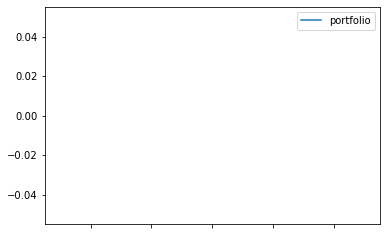

In [57]:
# Calculate rolling standard deviation
port_returns_rolling = port_returns[["portfolio"]].rolling(window = 21).std()
# Plot rolling standard deviation
port_returns_rolling.plot()

### Calculate and plot the correlation

<AxesSubplot:>

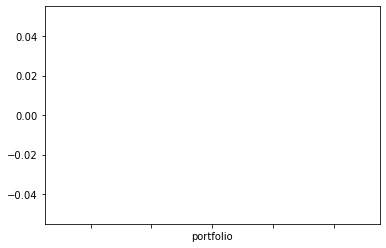

In [63]:
# Calculate and plot the correlation
correlation_portfolio = pd.DataFrame(port_returns.corr()).loc[:,"portfolio"]
correlation_portfolio[correlation_portfolio==correlation_portfolio[correlation_portfolio<1].max()]
correlation_portfolio.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

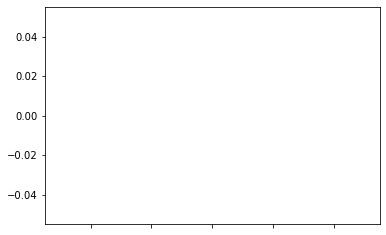

In [67]:
# Calculate and plot Beta
rolling_covariance = port_returns['portfolio'].rolling(window=60).cov(port_returns['portfolio'])
rolling_variance = port_returns['portfolio'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Calculate Annualized Sharpe Ratios
trading_days = port_returns.count()
sharpe_ratios = port_returns.mean()*trading_days/(port_returns.std()*np.sqrt(trading_days))

<AxesSubplot:>

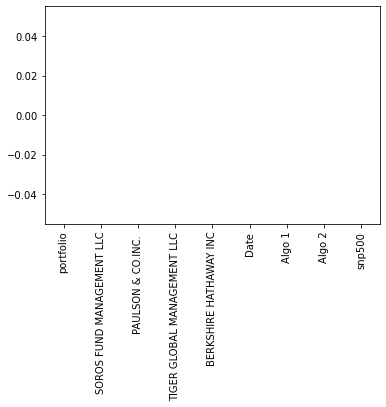

In [71]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [73]:
## My portfolio performs well over all other except ALGO 1 performs better